LOADING ALL THE NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

DATASET LOADING

In [39]:
# Load the dataset CSV file
data = pd.read_csv('fer2013.csv')
data

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [40]:
# Check the structure of the data (print first few rows)
print(data.head())

   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training


In [41]:
data.describe()

,emotion
count,35887.000000
mean,3.323265
std,1.873819
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [43]:
data.shape

(35887, 3)

<Axes: xlabel='emotion', ylabel='count'>

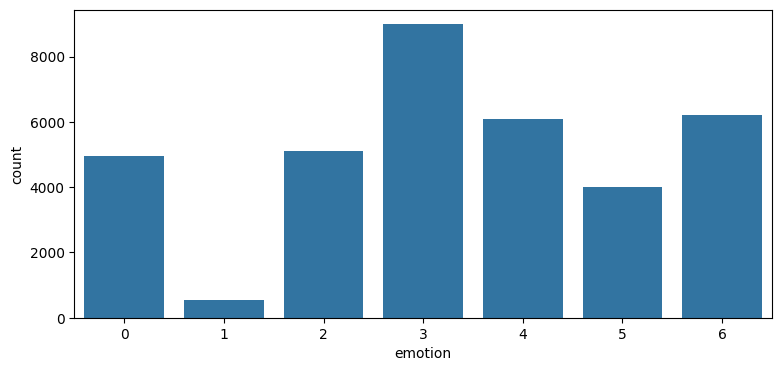

In [44]:
""" matplotlib => to define size , sns => to use counterplot """
plt.figure(figsize=(9,4))
sns.countplot(x='emotion', data=data)

In [45]:
data['emotion'].value_counts()
#where ** 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral**

emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64

<Axes: xlabel='Usage', ylabel='count'>

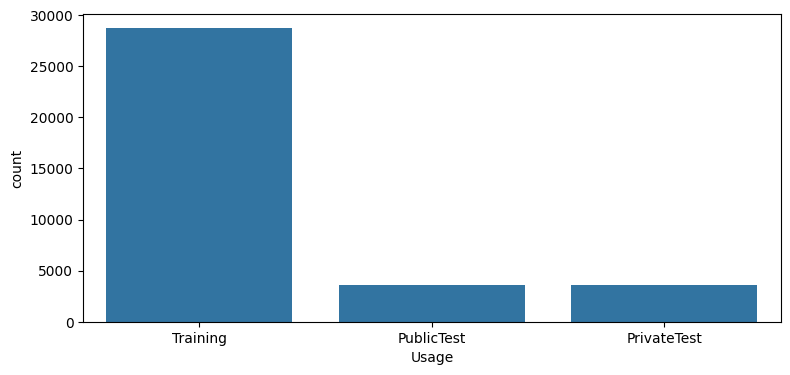

In [46]:
plt.figure(figsize=(9,4))
sns.countplot(x='Usage', data=data)

In [47]:
data['Usage'].value_counts()

Usage
Training       28709
PublicTest      3589
PrivateTest     3589
Name: count, dtype: int64

PREPROCESSING 

In [48]:
# Function to preprocess data (convert pixels to numpy arrays, normalize, one-hot encode labels)
def preprocess_data(data):
    images = []
    labels = []
    
    for index, row in data.iterrows():
        # Convert the 'pixels' column to a numpy array
        pixels = np.array([int(i) for i in row['pixels'].split(' ')])  # Convert string of pixels to array
        pixels = pixels.reshape(48, 48, 1)  # Reshape to 48x48 grayscale image (FER dataset)
        images.append(pixels)
        # Append the emotion label (categorical)
        labels.append(row['emotion'])
    # Convert lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)
    
    # Normalize the images to range [0, 1]
    images = images.astype('float32') / 255.0
    
    # One-hot encode the labels (7 emotions)
    labels = to_categorical(labels, num_classes=7)
    
    return images, labels

# Preprocess the entire dataset
X, y = preprocess_data(data)



DISPLAYING SAMPLE IMAGE

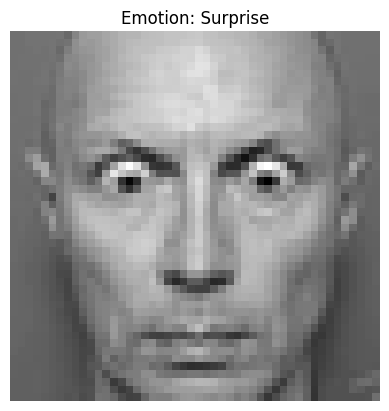

In [57]:
def display_emotion_image(X, y, emotion_index, emotion_label_map):
    """
    Display the first image corresponding to the specified emotion.
    Args:
    X (numpy array): Array of preprocessed images.
    y (numpy array): Array of one-hot encoded labels.
    emotion_index (int): The index of the desired emotion (0-6).
    emotion_label_map (dict): Mapping of emotion indices to labels (e.g., {0: 'Angry', 1: 'Happy', ...}).
    """
    # Find the index of the first image with the specified emotion
    target_index = np.argmax(y, axis=1) == emotion_index
    if np.any(target_index):
        # Extract the image
        image = X[target_index][0]  # First image of the specified emotion
        
        # Display the image
        plt.imshow(image.squeeze(), cmap='gray')  # Remove the channel dimension with .squeeze()
        plt.title(f"Emotion: {emotion_label_map[emotion_index]}")
        plt.axis('off')
        plt.show()
    else:
        print(f"No images found for emotion index {emotion_index}")

# Example usage
emotion_label_map = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral"
}

# Display an image for the emotion 
display_emotion_image(X, y, emotion_index=5, emotion_label_map=emotion_label_map)


SPLITTING THE DATASET 

In [50]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Optionally, split the training set into training and validation sets
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [51]:
# View shapes of train and test sets
print("Train Features Shape:", X_train.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Features Shape:", X_test.shape)
print("Test Labels Shape:", y_test.shape)

Train Features Shape: (28709, 48, 48, 1)
Train Labels Shape: (28709, 7)
Test Features Shape: (7178, 48, 48, 1)
Test Labels Shape: (7178, 7)


SAMPLE IMAGE - CONVERTING INTO GRAY SCALE

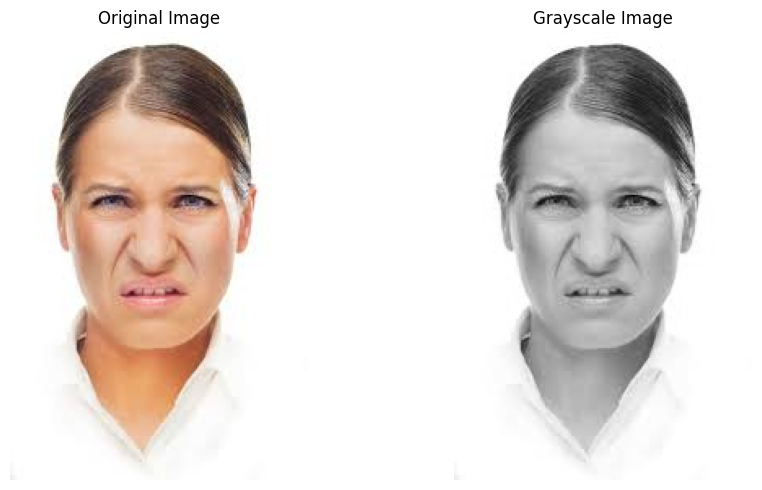

In [52]:

# Read the image
img = cv2.imread('dis.jpeg')

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Plot original and grayscale images
plt.figure(figsize=(10, 5))

# Display the original image (BGR to RGB for proper colors)
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display the grayscale image
plt.subplot(1, 2, 2)
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.tight_layout()
plt.show()



MODEL BUILDING

In [53]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Third Convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Fully connected layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Output layer (7 emotions)
model.add(Dense(7, activation='softmax'))



In [54]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


MODEL TRAINING

In [58]:
# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32)


Epoch 1/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 167s 186ms/step - accuracy: 0.3867 - loss: 1.5698
Epoch 2/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 208s 231ms/step - accuracy: 0.4794 - loss: 1.3646
Epoch 3/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 160s 178ms/step - accuracy: 0.5126 - loss: 1.2804
Epoch 4/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 169s 188ms/step - accuracy: 0.5428 - loss: 1.2021
Epoch 5/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 138s 153ms/step - accuracy: 0.5649 - loss: 1.1448
Epoch 6/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 131s 146ms/step - accuracy: 0.5916 - loss: 1.0844
Epoch 7/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 138s 154ms/step - accuracy: 0.6099 - loss: 1.0334
Epoch 8/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 129s 144ms/step - accuracy: 0.6295 - loss: 0.9869
Epoch 9/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 130s 144ms/step - accuracy: 0.6519 - loss: 0.9265
Epoch 10/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 129s 144ms/step - accuracy: 0.6656 - loss: 0.8919
Epoch 11/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 131s 146ms/step - accuracy: 0.6863 - loss: 0.8342
Epoch 12

In [59]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,824,279 (14.59 MB)

 Trainable params: 1,274,759 (4.86 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,549,520 (9.73 MB)

In [60]:
model.save("emotion_model.h5")

In [61]:
# Evaluate on training data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

Training Accuracy: 96.31%


In [62]:
# Evaluate on testing data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Testing Accuracy: 56.70%


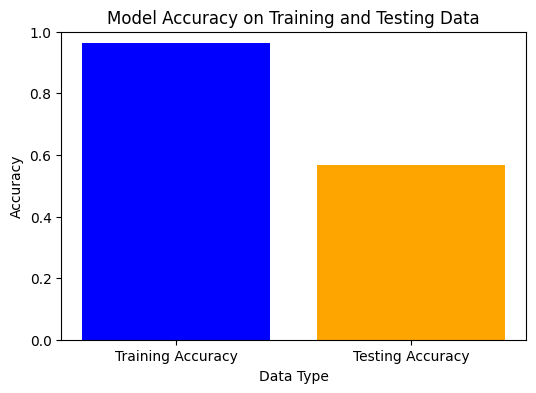

In [64]:
# Store accuracies for plotting
accuracies = [train_accuracy, test_accuracy]
labels = ['Training Accuracy', 'Testing Accuracy']

# Plot the accuracies
plt.figure(figsize=(6, 4))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.xlabel('Data Type')
plt.ylabel('Accuracy')
plt.title('Model Accuracy on Training and Testing Data')
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.show()